In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
from shapely import wkt
import plotly.express as px



In [4]:
covid_casesvacc=gpd.read_file('/home/jovyan/206a assigment/Midterm/nyc_covid_casevacc.geojson')
covid_casesvacc.head()

,MODZCTA,label,NEIGHBORHO,BOROUGH_GR,COVID_CASE,COVID_CA_1,POP_DENOMI,COVID_DEAT,COVID_DE_1,PERCENT_PO,TOTAL_COVI,NEIGHBOR_1,PRIORITY_N,Indicator,N_FULLY_VA,N_PARTIALL,PERC_FULLY,PERC_PARTI,POPULATION,geometry
0,10001,"10001, 10118",Chelsea/NoMad/West Chelsea,Manhattan,1127,4081.40,27613.09,29,105.02,6.69,17102,Chelsea/NoMad/West Chelsea,No,5,"1,422","1,310",6,5,"25,537","POLYGON ((-8236277.987 4974664.435, -8236327.8..."
1,10002,10002,Chinatown/Lower East Side,Manhattan,4304,5714.08,75322.71,213,282.78,10.54,41520,Chinatown/Lower East Side,Yes,7,"3,187","4,738",5,7,"63,973","POLYGON ((-8237364.465 4970258.242, -8237318.7..."
2,10003,10003,East Village/Gramercy/Greenwich Village,Manhattan,1988,3682.99,53977.81,40,74.10,5.33,37718,East Village/Gramercy/Greenwich Village,Yes,6,"3,410","2,883",7,6,"50,399","POLYGON ((-8236377.284 4971559.548, -8236461.5..."
3,10004,10004,Financial District,Manhattan,207,6964.74,2972.12,2,67.29,6.47,3217,Financial District,No,8,181,208,7,8,"2,685","MULTIPOLYGON (((-8238562.597 4969325.550, -823..."
4,10005,10005,Financial District,Manhattan,295,3368.65,8757.23,0,0.00,5.43,5356,None,None,3,408,273,5,3,"8,170","POLYGON ((-8238513.505 4968645.216, -8238653.3..."


In [27]:
covid_casesvacc.columns.to_list()

['MODZCTA',
 'label',
 'NEIGHBORHO',
 'BOROUGH_GR',
 'COVID_CASE',
 'COVID_CA_1',
 'POP_DENOMI',
 'COVID_DEAT',
 'COVID_DE_1',
 'PERCENT_PO',
 'TOTAL_COVI',
 'NEIGHBOR_1',
 'PRIORITY_N',
 'Indicator',
 'N_FULLY_VA',
 'N_PARTIALL',
 'PERC_FULLY',
 'PERC_PARTI',
 'POPULATION',
 'geometry',
 'COVID_CASE_Quantile',
 'PERC_FULLY_Quantile',
 'cases_vac_quartile',
 'PERC_PARTI_Quantile',
 'cases_partialvac_quartile']

In [44]:
covid_casesvacc['COVID_CASE_Quantile'] = pd.qcut(covid_casesvacc['COVID_CASE'], 4, ['Q1','Q2','Q3','Q4'])
covid_casesvacc['COVID_CaseRate_Quantile'] = pd.qcut(covid_casesvacc['COVID_CA_1'], 4, ['Q1','Q2','Q3','Q4'])
covid_casesvacc['PERC_FULLY_Quantile'] = pd.qcut(covid_casesvacc['PERC_FULLY'], 4, ['Q1','Q2','Q3','Q4'])
covid_casesvacc['PERC_PARTI_Quantile'] = pd.qcut(covid_casesvacc['PERC_PARTI'], 4, ['Q1','Q2','Q3','Q4'])
covid_casesvacc.head(1)


,MODZCTA,label,NEIGHBORHO,BOROUGH_GR,COVID_CASE,COVID_CA_1,POP_DENOMI,COVID_DEAT,COVID_DE_1,PERCENT_PO,...,PERC_PARTI,POPULATION,geometry,COVID_CASE_Quantile,PERC_FULLY_Quantile,cases_vac_quartile,PERC_PARTI_Quantile,cases_partialvac_quartile,COVID_CaseRate_Quantile,casesrate_vac_quartile
0,10001,"10001, 10118",Chelsea/NoMad/West Chelsea,Manhattan,1127,4081.4,27613.09,29,105.02,6.69,...,5,"25,537","POLYGON ((-8236277.987 4974664.435, -8236327.8...",Q1,Q2,None,Q1,"Low Cases, Low Vaccination",Q1,None


In [56]:
COVID_CASERATE_Q1 = covid_casesvacc[covid_casesvacc.COVID_CaseRate_Quantile == 'Q1']
COVID_CASERATE_Q1.COVID_CA_1.describe()

count      45.000000
mean     4106.954444
std       582.308166
min      2632.080000
25%      3727.480000
50%      4081.400000
75%      4605.330000
max      5157.200000
Name: COVID_CA_1, dtype: float64

In [57]:
COVID_CASERATE_Q2 = covid_casesvacc[covid_casesvacc.COVID_CaseRate_Quantile == 'Q2']
COVID_CASERATE_Q2.COVID_CA_1.describe()

count      44.000000
mean     6046.648409
std       495.043269
min      5172.130000
25%      5751.115000
50%      6044.100000
75%      6532.050000
max      6741.610000
Name: COVID_CA_1, dtype: float64

In [58]:
COVID_CASERATE_Q3 = covid_casesvacc[covid_casesvacc.COVID_CaseRate_Quantile == 'Q3']
COVID_CASERATE_Q3.COVID_CA_1.describe()

count      44.000000
mean     7402.638864
std       433.232129
min      6761.180000
25%      6968.715000
50%      7425.535000
75%      7781.712500
max      8138.680000
Name: COVID_CA_1, dtype: float64

In [62]:
COVID_CASERATE_Q4 = covid_casesvacc[covid_casesvacc.COVID_CaseRate_Quantile == 'Q4']
COVID_CASERATE_Q4.COVID_CA_1.describe()

count       44.000000
mean      9118.473409
std        961.195730
min       8166.000000
25%       8492.775000
50%       8911.080000
75%       9381.012500
max      13558.860000
Name: COVID_CA_1, dtype: float64

In [65]:
PERC_FULLY_Q1 = covid_casesvacc[covid_casesvacc.PERC_FULLY_Quantile == 'Q1']
PERC_FULLY_Q1.PERC_FULLY.describe()

count    57.000000
mean      3.350877
std       0.582213
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: PERC_FULLY, dtype: float64

In [66]:
PERC_FULLY_Q2 = covid_casesvacc[covid_casesvacc.PERC_FULLY_Quantile == 'Q2']
PERC_FULLY_Q2.PERC_FULLY.describe()

count    54.000000
mean      5.481481
std       0.504349
min       5.000000
25%       5.000000
50%       5.000000
75%       6.000000
max       6.000000
Name: PERC_FULLY, dtype: float64

In [67]:
PERC_FULLY_Q3 = covid_casesvacc[covid_casesvacc.PERC_FULLY_Quantile == 'Q3']
PERC_FULLY_Q3.PERC_FULLY.describe()

count    22.0
mean      7.0
std       0.0
min       7.0
25%       7.0
50%       7.0
75%       7.0
max       7.0
Name: PERC_FULLY, dtype: float64

In [68]:
PERC_FULLY_Q4 = covid_casesvacc[covid_casesvacc.PERC_FULLY_Quantile == 'Q4']
PERC_FULLY_Q4.PERC_FULLY.describe()

count    44.000000
mean     11.545455
std       5.073665
min       8.000000
25%       8.000000
50%       9.000000
75%      14.000000
max      32.000000
Name: PERC_FULLY, dtype: float64

In [31]:
def cases_vac_quartile(c):
    if c['COVID_CASE_Quantile'] == 'Q4' and c['PERC_FULLY_Quantile'] == 'Q4':
        return 'High Cases, High Vaccination'
    else:
        if c['COVID_CASE_Quantile'] == 'Q1' and c['PERC_FULLY_Quantile'] == 'Q1':
            return 'Low Cases, Low Vaccination'
        else:
            if c['COVID_CASE_Quantile'] == 'Q4' and c['PERC_FULLY_Quantile'] == 'Q1':
                return 'High Cases, Low Vaccination'
            else: 
                if c['COVID_CASE_Quantile'] == 'Q1' and c['PERC_FULLY_Quantile'] == 'Q4':
                    return 'Low Cases, High Vaccination'
                
covid_casesvacc['cases_vac_quartile'] = covid_casesvacc.apply(cases_vac_quartile, axis=1)
covid_casesvacc.head(1)


,MODZCTA,label,NEIGHBORHO,BOROUGH_GR,COVID_CASE,COVID_CA_1,POP_DENOMI,COVID_DEAT,COVID_DE_1,PERCENT_PO,...,PERC_PARTI,POPULATION,geometry,COVID_CASE_Quantile,PERC_FULLY_Quantile,cases_vac_quartile,PERC_PARTI_Quantile,cases_partialvac_quartile,COVID_CaseRate_Quantile,casesrate_vac_quartile
0,10001,"10001, 10118",Chelsea/NoMad/West Chelsea,Manhattan,1127,4081.4,27613.09,29,105.02,6.69,...,5,"25,537","POLYGON ((-8236277.987 4974664.435, -8236327.8...",Q1,Q2,None,Q1,"Low Cases, Low Vaccination",Q1,None


In [32]:
# Covid Case Count and Full Vaccination Map  
def cases_vac_quartile(c):
    if c['COVID_CaseRate_Quantile'] == 'Q4' and c['PERC_FULLY_Quantile'] == 'Q4':
        return 'High Cases, High Vaccination'
    else:
        if c['COVID_CaseRate_Quantile'] == 'Q1' and c['PERC_FULLY_Quantile'] == 'Q1':
            return 'Low Cases, Low Vaccination'
        else:
            if c['COVID_CaseRate_Quantile'] == 'Q4' and c['PERC_FULLY_Quantile'] == 'Q1':
                return 'High Cases, Low Vaccination'
            else: 
                if c['COVID_CaseRate_Quantile'] == 'Q1' and c['PERC_FULLY_Quantile'] == 'Q4':
                    return 'Low Cases, High Vaccination'
                
covid_casesvacc['casesrate_vac_quartile'] = covid_casesvacc.apply(cases_vac_quartile, axis=1)
covid_casesvacc.head(1)


,MODZCTA,label,NEIGHBORHO,BOROUGH_GR,COVID_CASE,COVID_CA_1,POP_DENOMI,COVID_DEAT,COVID_DE_1,PERCENT_PO,...,PERC_PARTI,POPULATION,geometry,COVID_CASE_Quantile,PERC_FULLY_Quantile,cases_vac_quartile,PERC_PARTI_Quantile,cases_partialvac_quartile,COVID_CaseRate_Quantile,casesrate_vac_quartile
0,10001,"10001, 10118",Chelsea/NoMad/West Chelsea,Manhattan,1127,4081.4,27613.09,29,105.02,6.69,...,5,"25,537","POLYGON ((-8236277.987 4974664.435, -8236327.8...",Q1,Q2,None,Q1,"Low Cases, Low Vaccination",Q1,None


In [33]:
#Covid Case Rate and Full Vaccination
def cases_vac_quartile(c):
    if c['COVID_CaseRate_Quantile'] == 'Q4' and c['PERC_FULLY_Quantile'] == 'Q4':
        return 'High Cases, High Vaccination'
    else:
        if c['COVID_CaseRate_Quantile'] == 'Q1' and c['PERC_FULLY_Quantile'] == 'Q1':
            return 'Low Cases, Low Vaccination'
        else:
            if c['COVID_CaseRate_Quantile'] == 'Q4' and c['PERC_FULLY_Quantile'] == 'Q1':
                return 'High Cases, Low Vaccination'
            else: 
                if c['COVID_CaseRate_Quantile'] == 'Q1' and c['PERC_FULLY_Quantile'] == 'Q4':
                    return 'Low Cases, High Vaccination'
                
covid_casesvacc['casesrate_vac_quartile'] = covid_casesvacc.apply(cases_vac_quartile, axis=1)
covid_casesvacc.head(1)


,MODZCTA,label,NEIGHBORHO,BOROUGH_GR,COVID_CASE,COVID_CA_1,POP_DENOMI,COVID_DEAT,COVID_DE_1,PERCENT_PO,...,PERC_PARTI,POPULATION,geometry,COVID_CASE_Quantile,PERC_FULLY_Quantile,cases_vac_quartile,PERC_PARTI_Quantile,cases_partialvac_quartile,COVID_CaseRate_Quantile,casesrate_vac_quartile
0,10001,"10001, 10118",Chelsea/NoMad/West Chelsea,Manhattan,1127,4081.4,27613.09,29,105.02,6.69,...,5,"25,537","POLYGON ((-8236277.987 4974664.435, -8236327.8...",Q1,Q2,None,Q1,"Low Cases, Low Vaccination",Q1,None


In [59]:
def casesrate_partialvac_quartile(c):
    if c['COVID_CaseRate_Quantile'] == 'Q4' and c['PERC_PARTI_Quantile'] == 'Q4':
        return 'High Cases, High Vaccination'
    else:
        if c['COVID_CaseRate_Quantile'] == 'Q1' and c['PERC_PARTI_Quantile'] == 'Q1':
            return 'Low Cases, Low Vaccination'
        else:
            if c['COVID_CaseRate_Quantile'] == 'Q4' and c['PERC_PARTI_Quantile'] == 'Q1':
                return 'High Cases, Low Vaccination'
            else: 
                if c['COVID_CaseRate_Quantile'] == 'Q1' and c['PERC_PARTI_Quantile'] == 'Q4':
                    return 'Low Cases, High Vaccination'
                
covid_casesvacc['casesrate_partialvac_quartile'] = covid_casesvacc.apply(casesrate_partialvac_quartile, axis=1)
covid_casesvacc.head(1)


,MODZCTA,label,NEIGHBORHO,BOROUGH_GR,COVID_CASE,COVID_CA_1,POP_DENOMI,COVID_DEAT,COVID_DE_1,PERCENT_PO,...,POPULATION,geometry,COVID_CASE_Quantile,PERC_FULLY_Quantile,cases_vac_quartile,PERC_PARTI_Quantile,cases_partialvac_quartile,COVID_CaseRate_Quantile,casesrate_vac_quartile,casesrate_partialvac_quartile
0,10001,"10001, 10118",Chelsea/NoMad/West Chelsea,Manhattan,1127,4081.4,27613.09,29,105.02,6.69,...,"25,537","POLYGON ((-8236277.987 4974664.435, -8236327.8...",Q1,Q2,None,Q1,"Low Cases, Low Vaccination",Q1,None,"Low Cases, Low Vaccination"


In [25]:
covid_casesvacc.cases_vac_quartile.value_counts().sum()

52

In [24]:
covid_casesvacc.cases_partialvac_quartile.value_counts().sum()

57

In [37]:
covid_casesvacc.casesrate_vac_quartile.value_counts().sum()

51

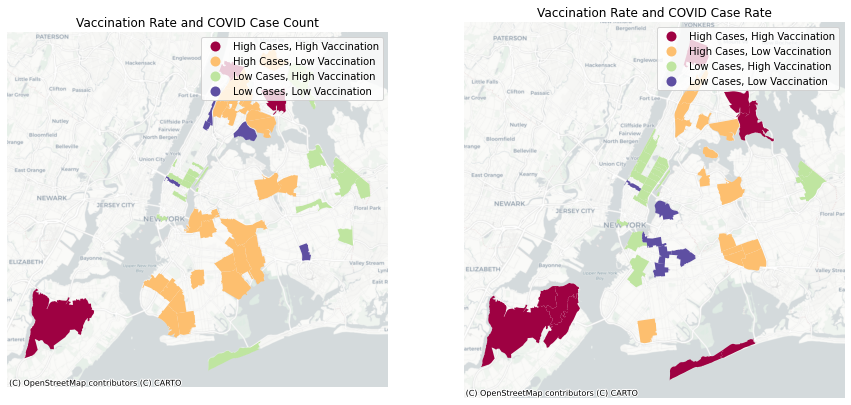

In [42]:
fig, axs=plt.subplots(1, 2, figsize=(15,10))

ax1, ax2 = axs 

covid_casesvacc.plot(ax=ax1,
                column= 'cases_vac_quartile',
               legend=True,
              cmap=plt.get_cmap('Spectral'))

ax1.set_title("Vaccination Rate and COVID Case Count")

ax1.axis('off')
ctx.add_basemap(ax=ax1,source=ctx.providers.CartoDB.Positron)

#case rate and full vaccine quartile
covid_casesvacc.plot(ax=ax2,
                column= 'casesrate_vac_quartile',
               legend=True,
              cmap=plt.get_cmap('Spectral'))

ax2.set_title("Vaccination Rate and COVID Case Rate")

ax2.axis('off')
ctx.add_basemap(ax=ax2,source=ctx.providers.CartoDB.Positron)


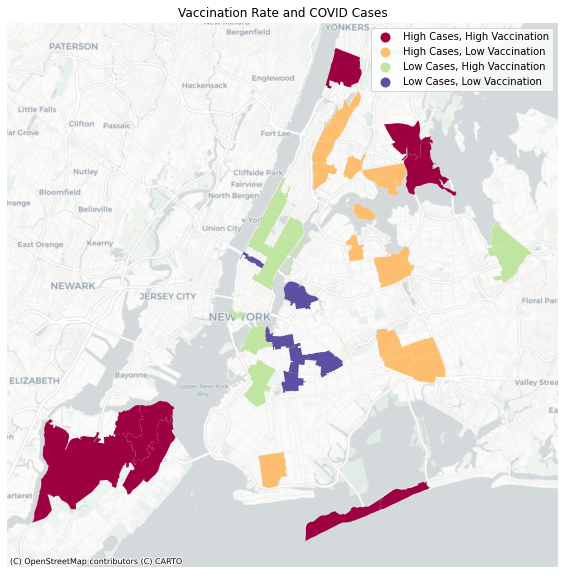

In [38]:
#case rate and full vaccine quartile
fig, ax=plt.subplots(figsize=(15,10))
covid_casesvacc.plot(ax=ax,
                column= 'casesrate_vac_quartile',
               legend=True,
              cmap=plt.get_cmap('Spectral'))

ax.set_title("Vaccination Rate and COVID Case Rate")

ax.axis('off')
ctx.add_basemap(ax=ax,source=ctx.providers.CartoDB.Positron)

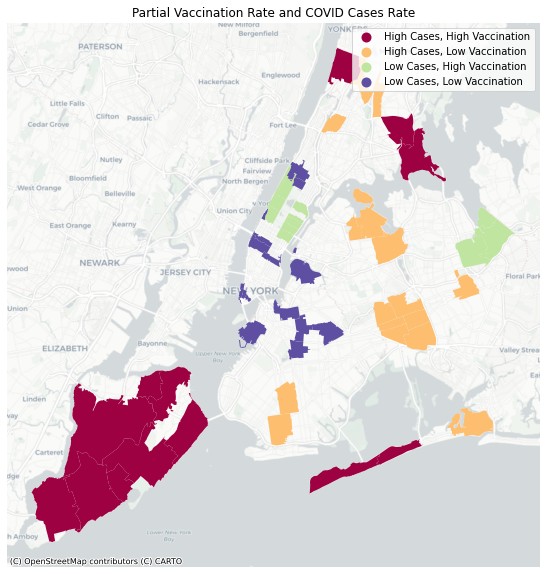

In [61]:
fig, ax=plt.subplots(figsize=(15,10))
covid_casesvacc.plot(ax=ax,
                column= 'casesrate_partialvac_quartile',
               legend=True,
              cmap=plt.get_cmap('Spectral'))

ax.set_title("Partial Vaccination Rate and COVID Cases Rate")

ax.axis('off')
ctx.add_basemap(ax=ax,source=ctx.providers.CartoDB.Positron)

In [23]:
covid_casesvacc.shape

(177, 25)